#### This project focuses on analyzing consumer complaints data to investigate common issues and products, identify submission trends and assess response effectiveness.

### Project Outline

1. Data Cleaning & Transformation
* Handle missing values (identify and handle missing or null values);
* Create new column (calculate response time by creating a new column);

2. Data Analysis
* Frequency analysis (identify  most common products, issues, and submission methods);
* Timely responses (find distribution of timely responses across different products);

3. Data Visualization
* Frequent products (bar chart to show top products with most complaints);
* Frequent issues (bar chart to show top reported issues).

In [1]:
import pandas as pd
data = pd.read_csv("/Users/kristapsmikuckis/Desktop/Consumer_Complaints.csv")

In [2]:
null_values = data.isnull().sum()
null_values

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Complaint ID                  62516 non-null  int64 
 1   Submitted via                 62516 non-null  object
 2   Date submitted                62516 non-null  object
 3   Date received                 62516 non-null  object
 4   State                         62516 non-null  object
 5   Product                       62516 non-null  object
 6   Sub-product                   62509 non-null  object
 7   Issue                         62516 non-null  object
 8   Sub-issue                     51658 non-null  object
 9   Company public response       60341 non-null  object
 10  Company response to consumer  62516 non-null  object
 11  Timely response?              61022 non-null  object
dtypes: int64(1), object(11)
memory usage: 5.7+ MB


In [4]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62511    False
62512    False
62513    False
62514    False
62515    False
Length: 62516, dtype: bool

In [5]:
data['Date submitted'] = pd.to_datetime(data['Date submitted'])
data['Date received'] = pd.to_datetime(data['Date received'])
data['Response time (days)'] = (data['Date received'] - data['Date submitted']).dt.days
data.head()

,Complaint ID,Submitted via,Date submitted,Date received,State,Product,Sub-product,Issue,Sub-issue,Company public response,Company response to consumer,Timely response?,Response time (days)
0,4848023,Referral,2021-10-24,2021-10-27,NY,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,Company has responded to the consumer and the ...,Closed with explanation,Yes,3
1,3621464,Web,2020-04-24,2020-04-24,FL,"Money transfer, virtual currency, or money ser...",Refund anticipation check,Lost or stolen check,NaN,Company has responded to the consumer and the ...,Closed with monetary relief,Yes,0
2,5818349,Web,2022-07-27,2022-07-27,CA,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,Company has responded to the consumer and the ...,Closed with explanation,Yes,0
3,7233015,Referral,2023-07-10,2023-07-11,CA,Credit card or prepaid card,General-purpose prepaid card,Problem getting a card or closing an account,"Trouble getting, activating, or registering a ...",NaN,In progress,NaN,1
4,5820224,Referral,2022-07-27,2022-07-28,VA,Credit card or prepaid card,General-purpose credit card or charge card,Closing your account,Company closed your account,Company has responded to the consumer and the ...,Closed with explanation,Yes,1


In [17]:
data_cleaned = data[data['Response time (days)'].notnull()].copy()
data_cleaned.loc[:, 'Timely response'] = data_cleaned['Response time (days)'] <= 1
product_counts = data_cleaned['Product'].value_counts()
issue_counts = data_cleaned['Issue'].value_counts()
submission_method_counts = data_cleaned['Submitted via'].value_counts()

print("Most Common Products:\n", product_counts.head(), "\n")
print("Most Common Issues:\n", issue_counts.head(), "\n")
print("Most Common Submission Methods:\n", submission_method_counts.head(), "\n")

Most Common Products:
 Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Mortgage                                                                         6601
Money transfer, virtual currency, or money service                               3453
Name: Product, dtype: int64 

Most Common Issues:
 Managing an account                                15109
Incorrect information on your report                4931
Problem with a purchase shown on your statement     4415
Closing an account                                  2953
Trouble during payment process                      2827
Name: Issue, dtype: int64 

Most Common Submission Methods:
 Web            45423
Referral       10766
Phone           4684
Postal mail     1318
Fax              233
Name: Submitted via, dtype: int64 



In [18]:
data_cleaned['Timely response'] = data_cleaned['Response time (days)'] <= 1
timely_response_distribution = data_cleaned.groupby('Product')['Timely response'].mean().sort_values(ascending=False)
timely_response_distribution_df = timely_response_distribution.reset_index().rename(columns={'Timely response': 'Proportion of Timely Responses'})
timely_response_distribution_rounded_df = timely_response_distribution_df.copy()
timely_response_distribution_rounded_df['Proportion of Timely Responses'] = timely_response_distribution_rounded_df['Proportion of Timely Responses'].round(2)
print("Timely Response by Product:\n", timely_response_distribution_rounded_df)

Timely Response by Product:
                                              Product  \
0  Credit reporting, credit repair services, or o...   
1  Money transfer, virtual currency, or money ser...   
2                        Credit card or prepaid card   
3                              Vehicle loan or lease   
4                                    Debt collection   
5                        Checking or savings account   
6                                           Mortgage   
7          Payday loan, title loan, or personal loan   
8                                       Student loan   

   Proportion of Timely Responses  
0                            0.94  
1                            0.92  
2                            0.90  
3                            0.89  
4                            0.88  
5                            0.86  
6                            0.83  
7                            0.81  
8                            0.74  


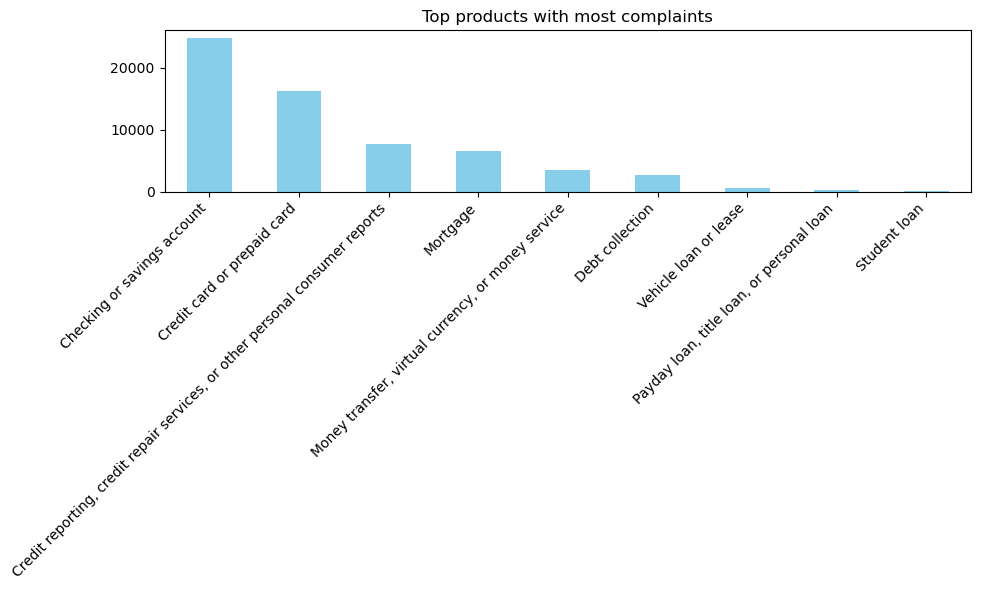

In [19]:
import matplotlib.pyplot as plt

top_products = product_counts.head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top products with most complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

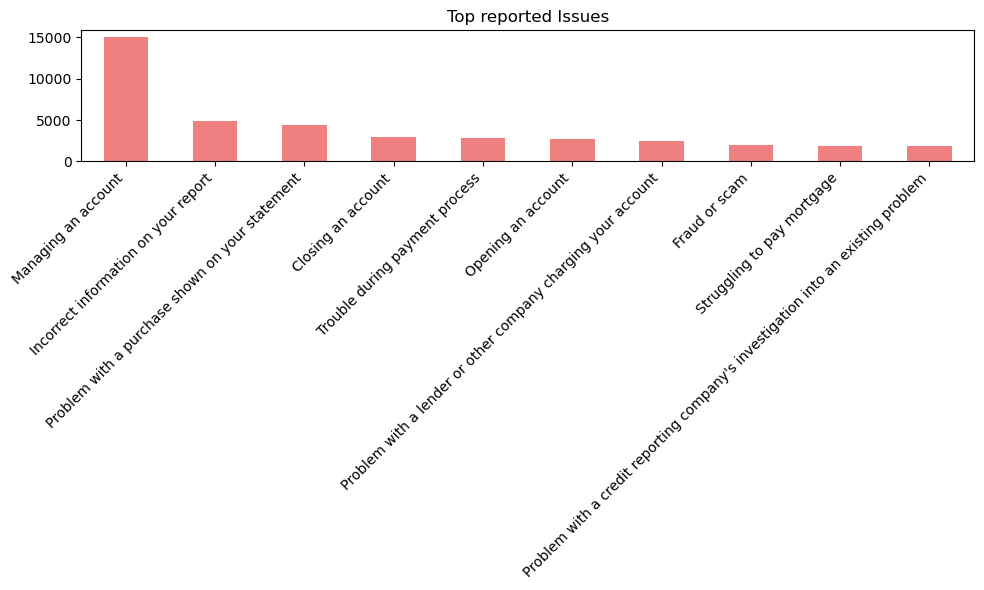

In [20]:
issue_counts = data_cleaned['Issue'].value_counts()
top_issues = issue_counts.head(10)
plt.figure(figsize=(10, 6))
top_issues.plot(kind='bar', color='lightcoral')
plt.title('Top reported Issues')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()